<a href="https://colab.research.google.com/github/NguyenHuynhNgoc20146187/AI/blob/main/Fuzzy_Date3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

67.94874286223298


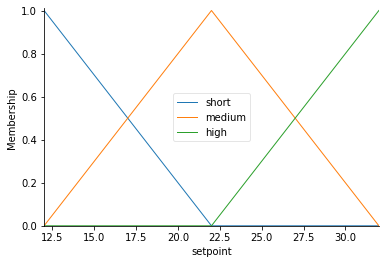

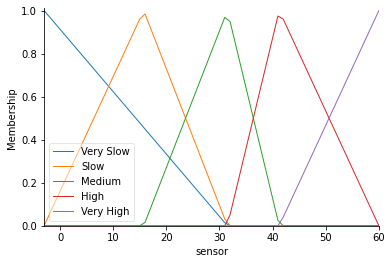

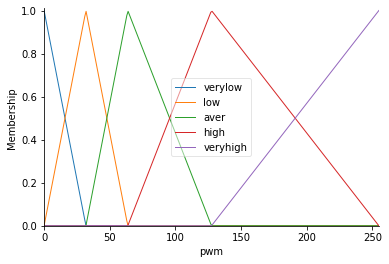

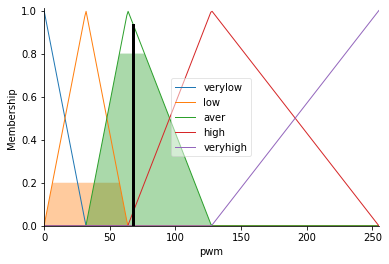

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

setpoint = ctrl.Antecedent(np.arange(12, 33,1),'setpoint') 
sensor = ctrl.Antecedent(np.arange(-3, 61,1),'sensor')
pwm = ctrl.Consequent(np.arange(0,256,1),'pwm')

setpoint['short'] = fuzz.trimf(setpoint.universe,[12,12,22]) 
setpoint['medium'] = fuzz.trimf(setpoint.universe,[12,22,32]) 
setpoint['high'] = fuzz.trimf(setpoint.universe,[22,32,32]) 


sensor['Very Slow'] = fuzz.trimf(sensor.universe,[-3,-3,31.5]) 
sensor['Slow'] = fuzz.trimf(sensor.universe,[-3,15.75,31.5]) 
sensor['Medium'] = fuzz.trimf(sensor.universe,[15.75,31.5,41.25]) 
sensor['High'] = fuzz.trimf(sensor.universe,[31.5,41.25,60]) 
sensor['Very High'] = fuzz.trimf(sensor.universe,[41.25,60,60])


pwm['verylow'] = fuzz.trimf(pwm.universe,[0,0,255/8]) 
pwm['low'] = fuzz.trimf(pwm.universe,[0,255/8,255/4]) 
pwm['aver'] = fuzz.trimf(pwm.universe,[255/8,255/4,255/2]) 
pwm['high'] = fuzz.trimf(pwm.universe,[255/4,255/2,255]) 
pwm['veryhigh'] = fuzz.trimf(pwm.universe,[255/2,255,255])

setpoint.view()
sensor.view()
pwm.view()




rule1 = ctrl.Rule(setpoint['short']&sensor['Very Slow'],pwm['verylow'])
rule2 = ctrl.Rule(setpoint['short']&sensor['Slow'],pwm['low'])
rule3 = ctrl.Rule(setpoint['short']&sensor['Medium'],pwm['low'])
rule4 = ctrl.Rule(setpoint['short']&sensor['High'],pwm['low'])
rule5 = ctrl.Rule(setpoint['short']&sensor['Very High'],pwm['aver'])

rule6 = ctrl.Rule(setpoint['medium']&sensor['Very Slow'],pwm['low'])
rule7 = ctrl.Rule(setpoint['medium']&sensor['Slow'],pwm['low'])
rule8 = ctrl.Rule(setpoint['medium']&sensor['Medium'],pwm['aver'])
rule9 = ctrl.Rule(setpoint['medium']&sensor['High'],pwm['aver'])
rule10 = ctrl.Rule(setpoint['medium']&sensor['Very High'],pwm['high'])

rule11 = ctrl.Rule(setpoint['high']&sensor['Very Slow'],pwm['low'])
rule12 = ctrl.Rule(setpoint['high']&sensor['Slow'],pwm['aver'])
rule13 = ctrl.Rule(setpoint['high']&sensor['Medium'],pwm['aver'])
rule14 = ctrl.Rule(setpoint['high']&sensor['High'],pwm['high'])
rule15 = ctrl.Rule(setpoint['high']&sensor['Very High'],pwm['veryhigh'])


pwming_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,])
pwmi= ctrl.ControlSystemSimulation(pwming_ctrl)
pwmi.input['setpoint']=20
pwmi.input['sensor']=40
pwmi.compute()
print(pwmi.output['pwm'])
pwm.view(sim=pwmi)
